# References
- Precision is the percentage of predicted positives that were correctly classified; TP / (TP + FP)
- Recall is the percentage of actual positives that were correctly classified; TP / (TP + FN)
- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
- https://alexlenail.me/NN-SVG/index.html

# Import necessary modules

In [8]:
# For data processing
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Model
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Helper functions

In [9]:
def create_model(hidden_layer_units, input_dim, dropout_rate=0.2, model_name='model'):
    """
    Creates a neural network classifier model with:
        - l hidden layers, where l is len(hidden_layer_units)
        - hidden_layer_units[i] units for i'th layer
        - Categorical Crossentropy loss for multi-class classification
        - Adam optimizer
        - Accuracy, precision, and recall metrics
        - Dropout in each layer
        - Model name model_name
    
    Returns the compiled model.
    """
    
    model = Sequential(name=model_name)
    
    # Input layer
    model.add(Dense(hidden_layer_units[0], 
                    activation='relu', 
                    input_dim=input_dim,
                    name='Dense_1'))
    model.add(Dropout(dropout_rate, name='Dropout_1'))
    
    # Add the hidden layers
    l = 2
    for units in hidden_layer_units[1:]:
        model.add(Dense(units, activation='relu', name=f'Dense_{l}'))
        l += 1
        model.add(Dropout(dropout_rate, name=f'Dropout_{l}'))
    
    # Output layer (softmax outputs probabilities for each class)
    model.add(Dense(4, activation='softmax', name='Output'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])
    
    return model


def visualize_performance(y_train, y_train_pred, y_test, y_test_pred):
    """
    Creates a confusion matrix visualization for train and test set
    using heatmap with added information such as:
        - Accuracy
        - Precision
        - Recall
        - F1 score
        
    Returns the accuracy, precision, recall, and F1 score from test set.
    """
    
    f, ax = plt.subplots(ncols=2, figsize=(14, 4))
    f.suptitle('Training vs Test Performance', fontweight='bold', fontsize='x-large')
    
    # Training set
    cf_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(cf_train, fmt='.0f', annot=True, ax=ax[0])
    
    # Calculate metrics
    accuracy_train = np.trace(cf_train) / float(np.sum(cf_train))
    precision_train = cf_train[1,1] / sum(cf_train[:,1])
    recall_train = cf_train[1,1] / sum(cf_train[1,:])
    f1_score_train = 2 * precision_train * recall_train / (precision_train + recall_train)
    
    stats_text_train = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy_train, precision_train, recall_train, f1_score_train)
    
    ax[0].set(xlabel='Predicted' + stats_text_train, 
              ylabel='Actual', title='Training Performance')
    
    # Test set
    cf_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cf_test, fmt='.0f', annot=True, ax=ax[1])
    
    # Calculate metrics
    accuracy_test = np.trace(cf_test) / float(np.sum(cf_test))
    precision_test = cf_test[1,1] / sum(cf_test[:,1])
    recall_test = cf_test[1,1] / sum(cf_test[1,:])
    f1_score_test = 2 * precision_test * recall_test / (precision_test + recall_test)
    
    stats_text_test = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy_test, precision_test, recall_test, f1_score_test)
    
    ax[1].set(xlabel='Predicted' + stats_text_test, 
              ylabel='Actual', title='Test Performance')
    
    plt.show()
    
    return accuracy_test, precision_test, recall_test, f1_score_test


def test_performance(y_test, y_test_pred):
    """ 
    Returns the accuracy, precision, recall, and F1 score from test set.
    """

    # Test set
    cf_test = confusion_matrix(y_test, y_test_pred)
    
    # Calculate metrics
    accuracy_test = np.trace(cf_test) / float(np.sum(cf_test))
    precision_test = cf_test[1,1] / sum(cf_test[:,1])
    recall_test = cf_test[1,1] / sum(cf_test[1,:])
    f1_score_test = 2 * precision_test * recall_test / (precision_test + recall_test)
    
    return accuracy_test, precision_test, recall_test, f1_score_test


def visualize_training_history(history):
    """
    Creates a visualization of model's training process that contains:
        - Loss
        - Accuracy
        - Precision
        - Recall
    """
    f, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
    f.suptitle('Training History', fontweight='bold', fontsize='x-large')
    
    ax[0][0].plot(history.history['loss'], label='Loss (training data)')
    ax[0][0].set_title('Loss History')
    ax[0][0].set(ylabel='Loss', xlabel='Number of Epochs')
    ax[0][0].legend(loc="upper right")

    ax[0][1].plot(history.history['accuracy'], label='Accuracy (training data)')
    ax[0][1].set_title('Accuracy History')
    ax[0][1].set(ylabel='Loss', xlabel='Number of Epochs')
    ax[0][1].legend(loc="lower right")    
    
    ax[1][0].plot(history.history['precision'], label='Precision (training data)')
    ax[1][0].set_title('Precision History')
    ax[1][0].set(ylabel='Precision', xlabel='Number of Epochs')
    ax[1][0].legend(loc="lower right")
        
    ax[1][1].plot(history.history['recall'], label='Recall (training data)')
    ax[1][1].set_title('Recall History')
    ax[1][1].set(ylabel='Precision', xlabel='Number of Epochs')
    ax[1][1].legend(loc="lower right")

    
def visualize_multiple_training_histories(training_histories):
    """
    Creates a visualization of training histories from different resampling methods.
    
    Input: dictionary (key -> metric, value -> history callback)
    """
    
    
    f, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
    f.suptitle('Training Histories Between Different Resampling Methods'
               , fontweight='bold', fontsize='x-large')
    
    # Set title and labels for each axis
    ax[0][0].set_title('Loss History')
    ax[0][0].set(ylabel='Loss', xlabel='Number of Epochs')

    ax[1][0].set_title('Precision History')
    ax[1][0].set(ylabel='Precision', xlabel='Number of Epochs')

    ax[0][1].set_title('Accuracy History')
    ax[0][1].set(ylabel='Loss', xlabel='Number of Epochs')

    ax[1][1].set_title('Recall History')
    ax[1][1].set(ylabel='Precision', xlabel='Number of Epochs')
    
    # Plotting data
    for metric, cb in training_histories.items():
        ax[0][0].plot(cb.history['loss'], label=metric)
        ax[0][0].legend(loc="upper right")
        
        ax[0][1].plot(cb.history['accuracy'], label=metric)
        ax[0][1].legend(loc="lower right")
        
        ax[1][0].plot(cb.history['precision'], label=metric)
        ax[1][0].legend(loc="lower right")
        
        ax[1][1].plot(cb.history['recall'], label=metric)
        ax[1][1].legend(loc="lower right")
        
    plt.show()
    

def visualize_tests_performance(tests_performance):
    """
    Display 4 barplots comparing:
        - Accuracy
        - Precision
        - Recall
        - F1 Score
    on test sets between different resampling methods.
    """
    
    f, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
    f.suptitle('Tests Performance Between Different Resampling Methods'
               , fontweight='bold', fontsize='x-large')
    
    i = 0
    for metric, ls in tests_performance.items():
        # Takes the labels
        x = pd.DataFrame(ls).T.iloc[0].to_list()
        # Takes the values
        y = pd.DataFrame(ls).T.iloc[1].to_list()
        
        plot = sns.barplot(x=x, y=y, ax=ax[i // 2][i % 2])
        
        # Show the actual numbers on the barplots
        for p in plot.patches:
            plot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', 
                           va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
        
        ax[i // 2][i % 2].set(title=metric)
        ax[i // 2][i % 2].set_ylim(0, 1)
        
        i += 1
    
    plt.show()
    

def standardize(X_train, X_test):
    """
    Standardize the inputs of the train and test set.
    
    Returns the standardized inputs.
    """
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    return X_train_std, X_test_std

# Model training

In [10]:
# To store training histories of different resampling methods
training_histories = {}
tests_performance = {'Test Accuracy': [], 
                     'Test Precision': [], 
                     'Test Recall': [], 
                     'Test F1 Score': []}

## 1. First Model (SMOTE Resampling)

### Data preparation

In [11]:
# Import and prepare dataset
train_df = pd.read_csv('data_resampled_SMOTE.csv')
train_df = train_df.drop(columns=['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Road_Type'])

test_df = pd.read_csv('test.csv')
test_df = test_df.drop(columns=['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Road_Type'])

# Set 'Severity' as the target variable
y_train = train_df['Severity']
y_test = test_df['Severity']

# Remove 'Severity' from the features
X_train = train_df.drop(columns=['Severity'])
X_test = test_df.drop(columns=['Severity'])

# Standardize inputs
X_train, X_test = standardize(X_train, X_test)

In [12]:
# Convert target variables to one-hot encoded format
y_train_encoded = to_categorical(y_train - 1, num_classes=4)
y_test_encoded = to_categorical(y_test - 1, num_classes=4)

### Create model

In [13]:
model = create_model([16, 16, 16], input_dim=len(X_train[0]), model_name='smote-model')
model.summary()

Model: "smote-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 16)                432       
                                                                 
 Dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 Dense_2 (Dense)             (None, 16)                272       
                                                                 
 Dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 Dense_3 (Dense)             (None, 16)                272       
                                                                 
 Dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 Output (Dense)              (None, 4)                 

### Model training

In [14]:
history = model.fit(X_train, y_train_encoded, batch_size=16, epochs=100)
training_histories['SMOTE'] = history

Epoch 1/100
5877/5877 [==============================] - 3s 521us/step - loss: 0.7379 - accuracy: 0.6976 - precision: 0.7639 - recall: 0.6023
Epoch 2/100
5877/5877 [==============================] - 3s 502us/step - loss: 0.5370 - accuracy: 0.7902 - precision: 0.8061 - recall: 0.7672
Epoch 3/100
5877/5877 [==============================] - 3s 500us/step - loss: 0.4879 - accuracy: 0.8114 - precision: 0.8224 - recall: 0.7949
Epoch 4/100
5877/5877 [==============================] - 3s 518us/step - loss: 0.4676 - accuracy: 0.8204 - precision: 0.8298 - recall: 0.8077
Epoch 5/100
5877/5877 [==============================] - 3s 502us/step - loss: 0.4586 - accuracy: 0.8253 - precision: 0.8343 - recall: 0.8133
Epoch 6/100
5877/5877 [==============================] - 3s 508us/step - loss: 0.4461 - accuracy: 0.8300 - precision: 0.8389 - recall: 0.8191
Epoch 7/100
5877/5877 [==============================] - 3s 505us/step - loss: 0.4385 - accuracy: 0.8341 - precision: 0.8417 - recall: 0.8239
Epoch 

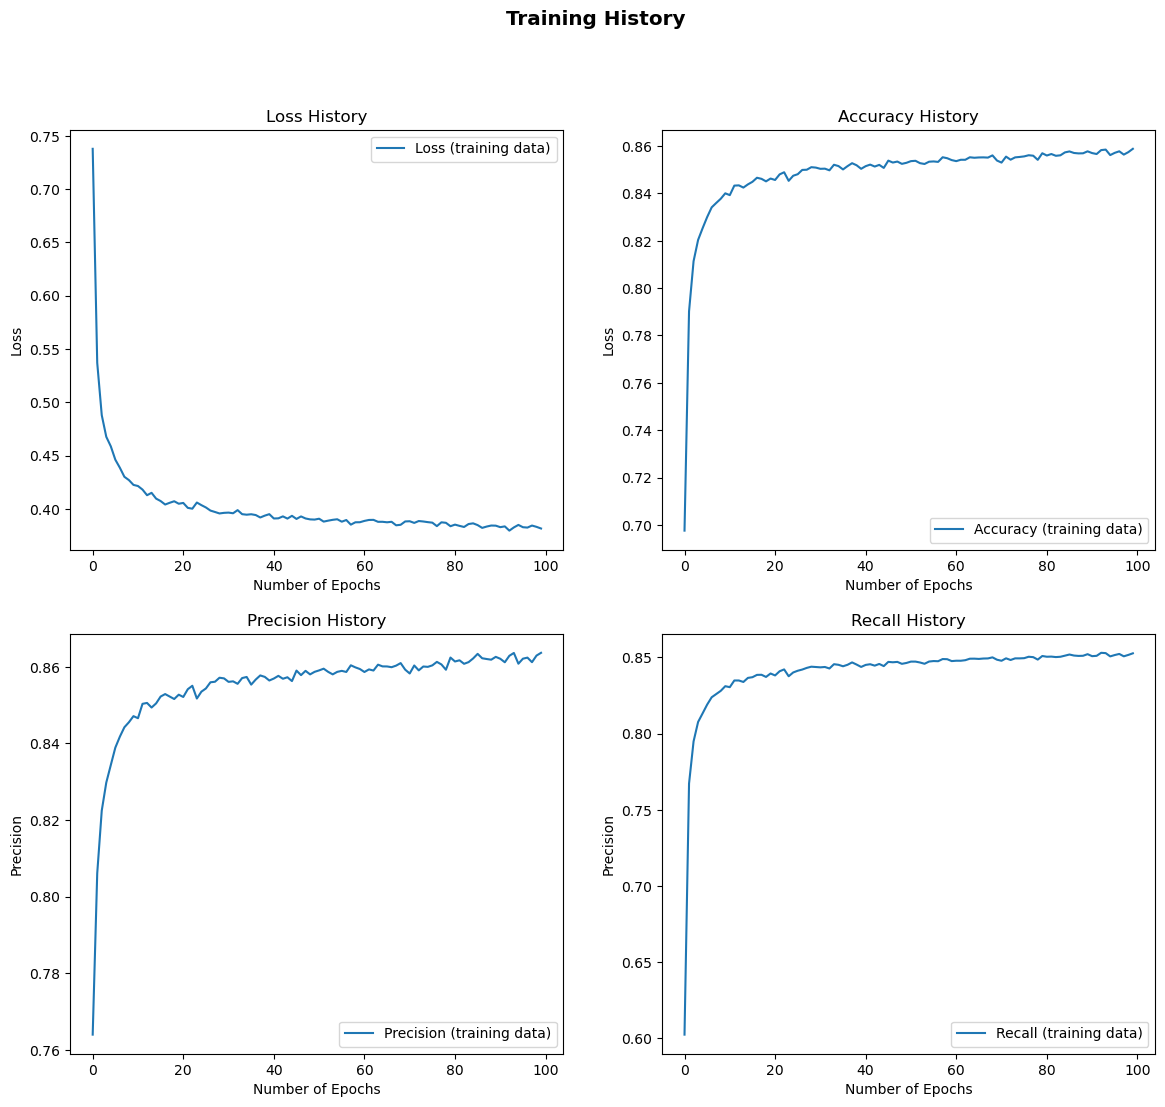

In [15]:
visualize_training_history(history)

### Model performance on train and test sets

188/188 [==============================] - 0s 282us/step


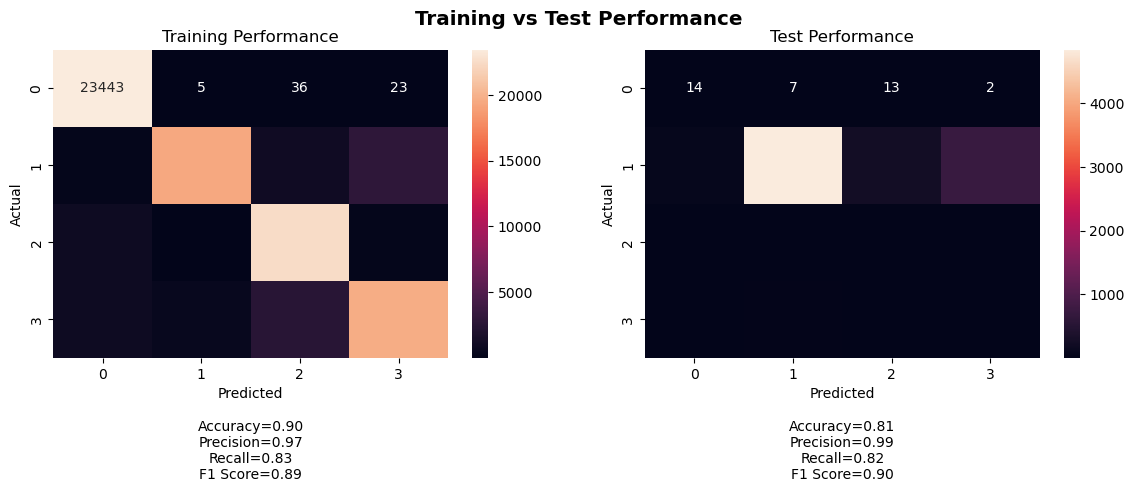

In [16]:
# Change probabilities to 0s and 1s
y_train_pred = (model.predict(X_train) >= 0.5).astype('int64')
y_test_pred = (model.predict(X_test) >= 0.5).astype('int64')

accuracy, precision, recall, f1_score = visualize_performance(y_train_encoded.argmax(axis=1), y_train_pred.argmax(axis=1), 
                                                              y_test_encoded.argmax(axis=1), y_test_pred.argmax(axis=1))

# Save values
tests_performance['Test Accuracy'].append(('SMOTE', accuracy))
tests_performance['Test Precision'].append(('SMOTE', precision))
tests_performance['Test Recall'].append(('SMOTE', recall))
tests_performance['Test F1 Score' ].append(('SMOTE', f1_score))

## 2. Second Model (SMOTETomek Resampling)

### Data preparation

In [17]:
# Import and prepare dataset
train_df = pd.read_csv('data_resampled_SMOTETomek.csv')
train_df = train_df.drop(columns=['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Road_Type'])

test_df = pd.read_csv('test.csv')
test_df = test_df.drop(columns=['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Road_Type'])

# Set 'Severity' as the target variable
y_train = train_df['Severity']
y_test = test_df['Severity']

# Remove 'Severity' from the features
X_train = train_df.drop(columns=['Severity'])
X_test = test_df.drop(columns=['Severity'])

# Standardize inputs
X_train, X_test = standardize(X_train, X_test)

In [18]:
# Convert target variables to one-hot encoded format
y_train_encoded = to_categorical(y_train - 1, num_classes=4)
y_test_encoded = to_categorical(y_test - 1, num_classes=4)

In [19]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


Unique values in y_train: [1 2 3 4]
Unique values in y_test: [1 2 3 4]


### Create model

In [20]:
# Create and compile the model
model = create_model([16, 16, 16], input_dim=X_train.shape[1], model_name='smotetomek-model')
model.summary()

Model: "smotetomek-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 16)                432       
                                                                 
 Dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 Dense_2 (Dense)             (None, 16)                272       
                                                                 
 Dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 Dense_3 (Dense)             (None, 16)                272       
                                                                 
 Dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 Output (Dense)              (None, 4)            

### Model training

In [21]:
# Train the model
history = model.fit(X_train, y_train_encoded, batch_size=16, epochs=100)
training_histories['SMOTETomek'] = history

Epoch 1/100
5876/5876 [==============================] - 3s 504us/step - loss: 0.7692 - accuracy: 0.6820 - precision: 0.7587 - recall: 0.5793
Epoch 2/100
5876/5876 [==============================] - 3s 507us/step - loss: 0.5594 - accuracy: 0.7829 - precision: 0.8003 - recall: 0.7579
Epoch 3/100
5876/5876 [==============================] - 3s 512us/step - loss: 0.5190 - accuracy: 0.7987 - precision: 0.8124 - recall: 0.7821
Epoch 4/100
5876/5876 [==============================] - 3s 505us/step - loss: 0.4987 - accuracy: 0.8091 - precision: 0.8211 - recall: 0.7934
Epoch 5/100
5876/5876 [==============================] - 3s 503us/step - loss: 0.4804 - accuracy: 0.8174 - precision: 0.8278 - recall: 0.8035
Epoch 6/100
5876/5876 [==============================] - 3s 504us/step - loss: 0.4664 - accuracy: 0.8237 - precision: 0.8338 - recall: 0.8117
Epoch 7/100
5876/5876 [==============================] - 3s 506us/step - loss: 0.4624 - accuracy: 0.8257 - precision: 0.8348 - recall: 0.8153
Epoch 

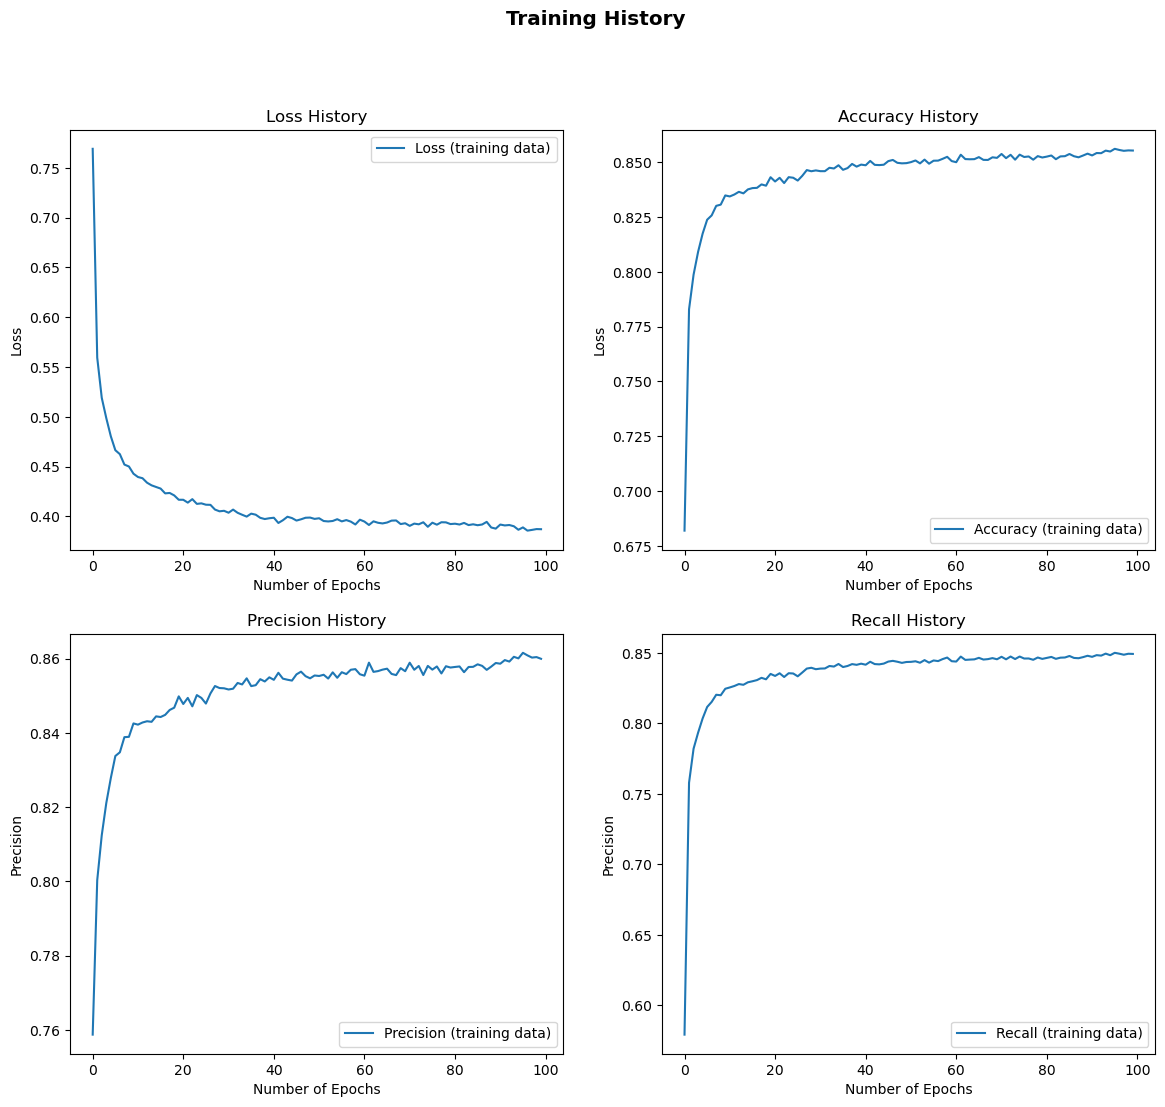

In [22]:
visualize_training_history(history)

### Model performance on train and test set

188/188 [==============================] - 0s 282us/step


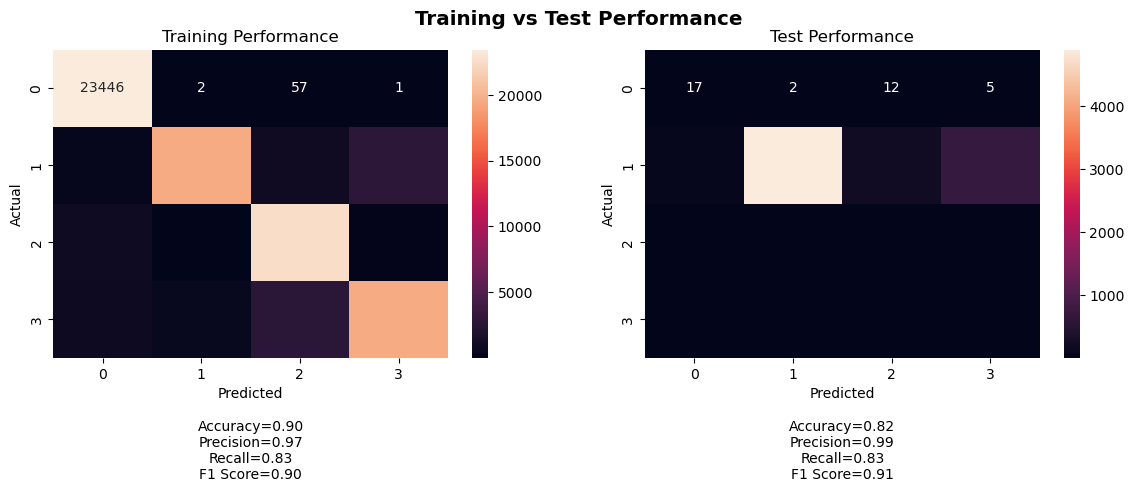

In [23]:
# Change probabilities to 0s and 1s
y_train_pred = (model.predict(X_train) >= 0.5).astype('int64')
y_test_pred = (model.predict(X_test) >= 0.5).astype('int64')

accuracy, precision, recall, f1_score = visualize_performance(y_train_encoded.argmax(axis=1), y_train_pred.argmax(axis=1), 
                                                              y_test_encoded.argmax(axis=1), y_test_pred.argmax(axis=1))

# Save values
tests_performance['Test Accuracy'].append(('SMOTETomek', accuracy))
tests_performance['Test Precision'].append(('SMOTETomek', precision))
tests_performance['Test Recall'].append(('SMOTETomek', recall))
tests_performance['Test F1 Score' ].append(('SMOTETomek', f1_score))

## 3. Third Model (SMOTEENN Resampling)

### Data preparation

In [24]:
# Import and prepare dataset
train_df = pd.read_csv('data_resampled_SMOTEENN.csv')
train_df = train_df.drop(columns=['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Road_Type'])

test_df = pd.read_csv('test.csv')
test_df = test_df.drop(columns=['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Road_Type'])

# Set 'Severity' as the target variable
y_train = train_df['Severity']
y_test = test_df['Severity']

# Remove 'Severity' from the features
X_train = train_df.drop(columns=['Severity'])
X_test = test_df.drop(columns=['Severity'])

# Standardize inputs
X_train, X_test = standardize(X_train, X_test)


In [25]:
# Convert target variables to one-hot encoded format
y_train_encoded = to_categorical(y_train - 1, num_classes=4)
y_test_encoded = to_categorical(y_test - 1, num_classes=4)

### Create model

In [26]:
# Create and compile the model
model = create_model([16, 16, 16], input_dim=X_train.shape[1], model_name='smoteenn-model')
model.summary()

Model: "smoteenn-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 16)                432       
                                                                 
 Dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 Dense_2 (Dense)             (None, 16)                272       
                                                                 
 Dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 Dense_3 (Dense)             (None, 16)                272       
                                                                 
 Dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 Output (Dense)              (None, 4)              

### Model training

In [27]:
# Train the model
history = model.fit(X_train, y_train_encoded, batch_size=16, epochs=100)
training_histories['SMOTEENN'] = history

Epoch 1/100
5608/5608 [==============================] - 3s 528us/step - loss: 0.7491 - accuracy: 0.6924 - precision: 0.7538 - recall: 0.5959
Epoch 2/100
5608/5608 [==============================] - 3s 504us/step - loss: 0.5619 - accuracy: 0.7816 - precision: 0.8002 - recall: 0.7542
Epoch 3/100
5608/5608 [==============================] - 3s 503us/step - loss: 0.5078 - accuracy: 0.8049 - precision: 0.8176 - recall: 0.7856
Epoch 4/100
5608/5608 [==============================] - 3s 504us/step - loss: 0.4852 - accuracy: 0.8140 - precision: 0.8268 - recall: 0.7982
Epoch 5/100
5608/5608 [==============================] - 3s 505us/step - loss: 0.4690 - accuracy: 0.8229 - precision: 0.8335 - recall: 0.8088
Epoch 6/100
5608/5608 [==============================] - 3s 508us/step - loss: 0.4589 - accuracy: 0.8270 - precision: 0.8369 - recall: 0.8148
Epoch 7/100
5608/5608 [==============================] - 3s 518us/step - loss: 0.4500 - accuracy: 0.8327 - precision: 0.8423 - recall: 0.8211
Epoch 

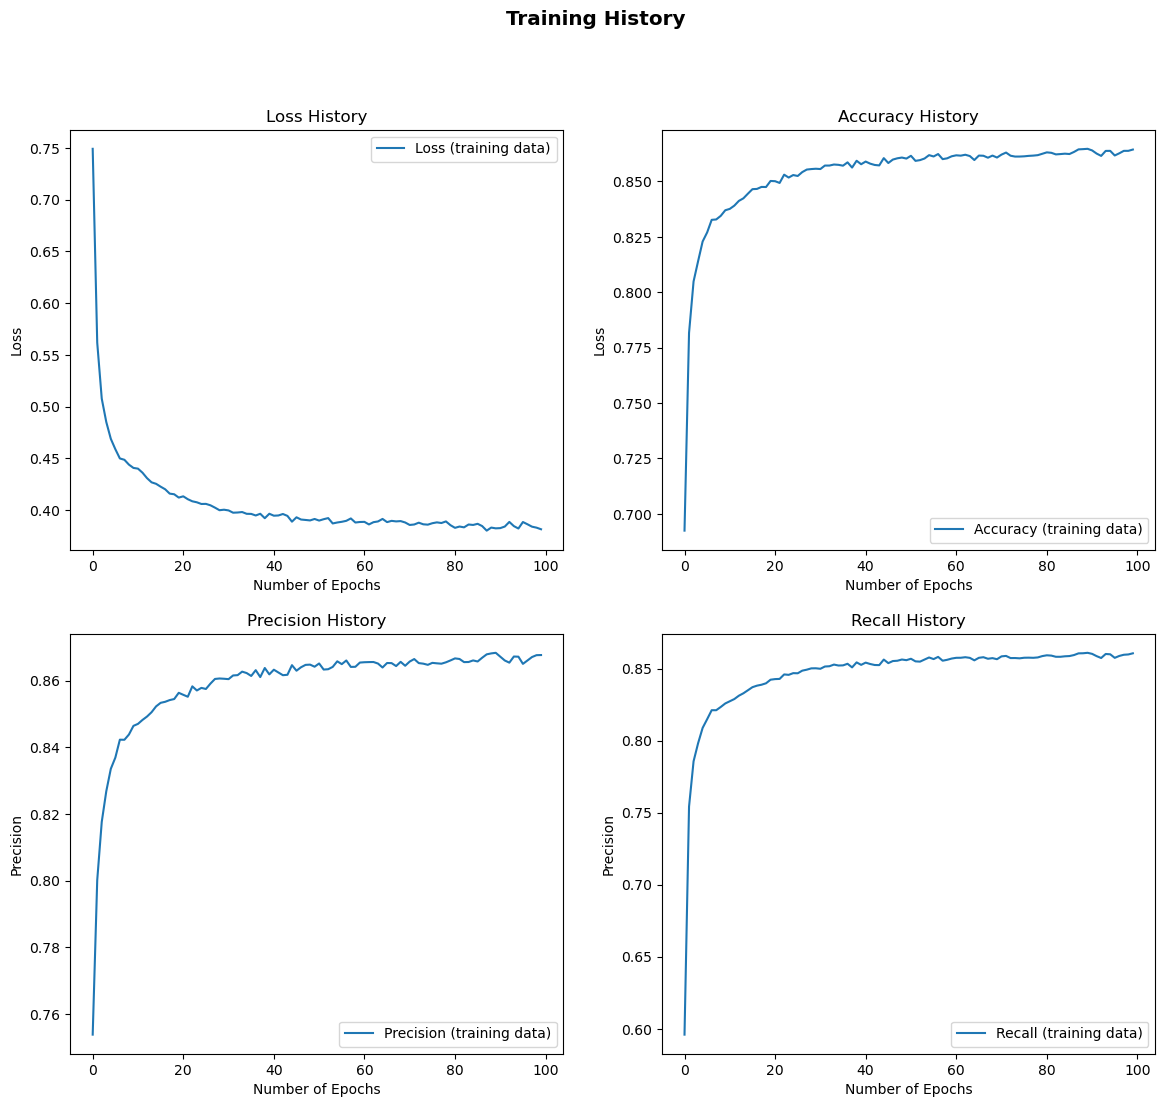

In [28]:
visualize_training_history(history)

### Model performance on train and test set

188/188 [==============================] - 0s 278us/step


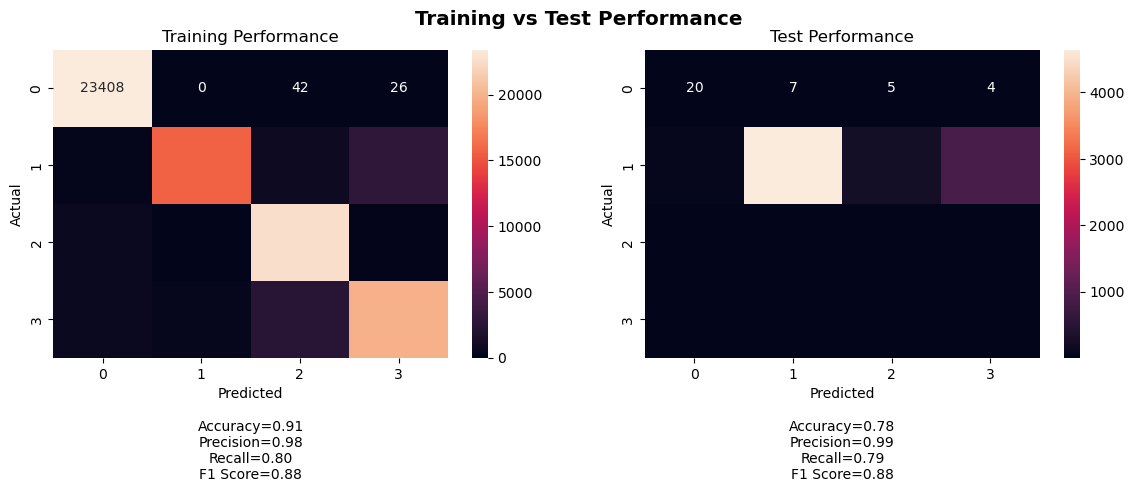

In [29]:
# Change probabilities to 0s and 1s
y_train_pred = (model.predict(X_train) >= 0.5).astype('int64')
y_test_pred = (model.predict(X_test) >= 0.5).astype('int64')

accuracy, precision, recall, f1_score = visualize_performance(y_train_encoded.argmax(axis=1), y_train_pred.argmax(axis=1), 
                                                              y_test_encoded.argmax(axis=1), y_test_pred.argmax(axis=1))

# Save values
tests_performance['Test Accuracy'].append(('SMOTEENN', accuracy))
tests_performance['Test Precision'].append(('SMOTEENN', precision))
tests_performance['Test Recall'].append(('SMOTEENN', recall))
tests_performance['Test F1 Score' ].append(('SMOTEENN', f1_score))

# Comparing performance between different resampling methods

## Training histories

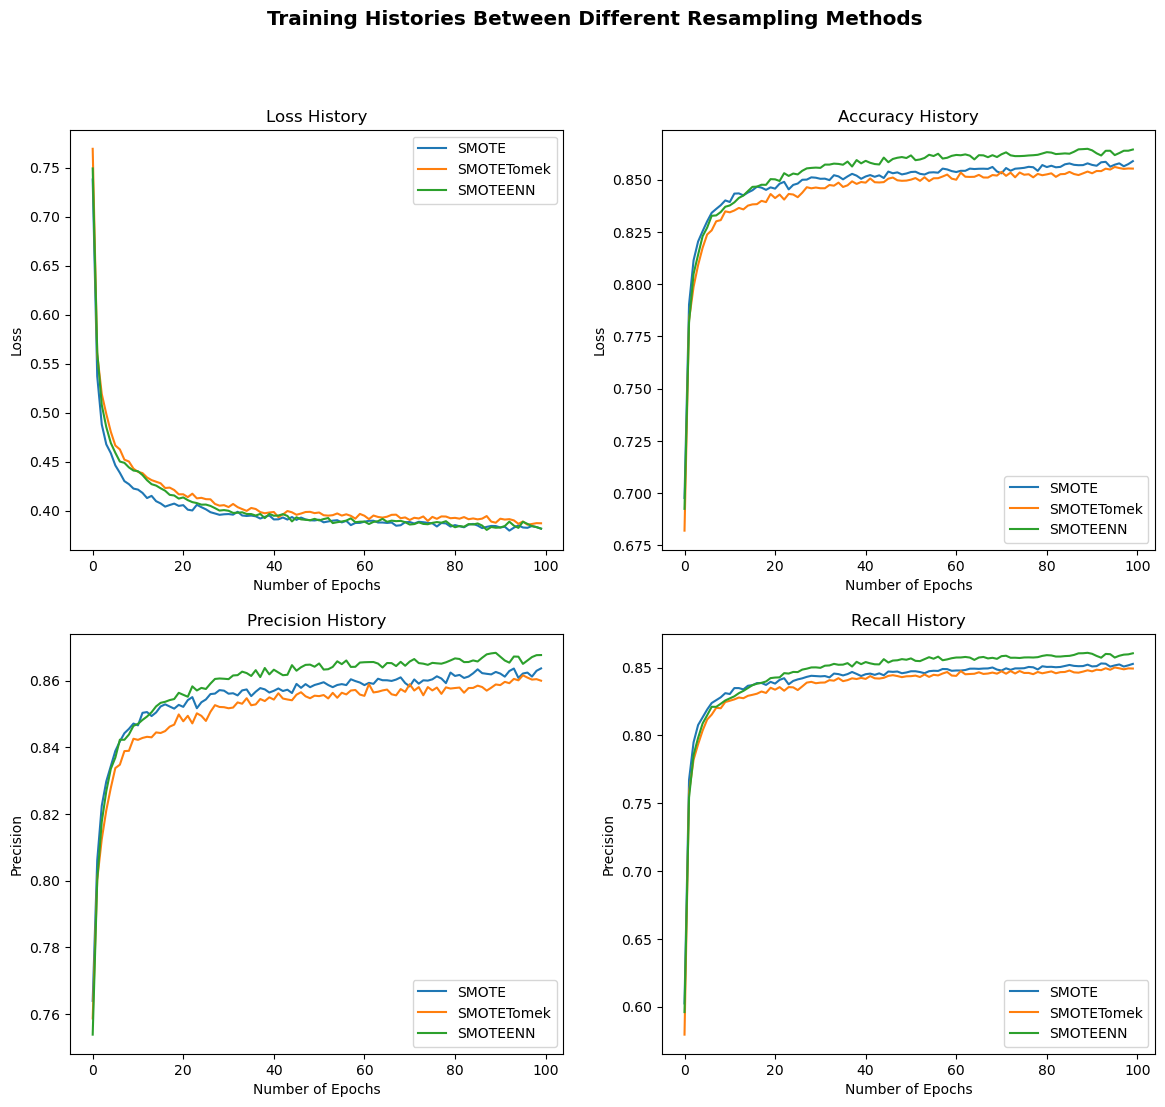

In [31]:
visualize_multiple_training_histories(training_histories)

## Performance on test set

/Users/a658811/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/a658811/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/a658811/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/a658811/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


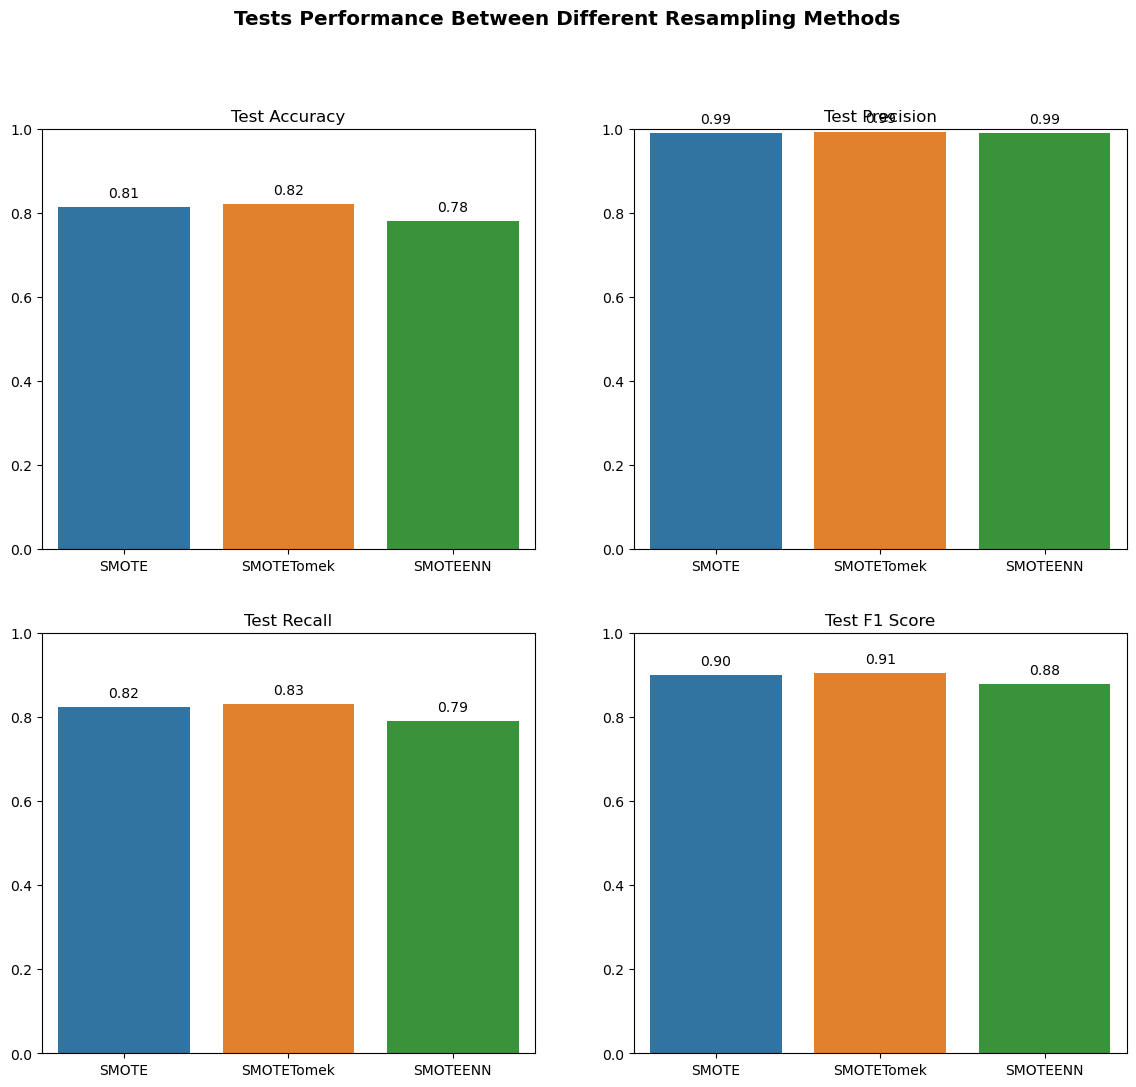

In [30]:
visualize_tests_performance(tests_performance)

After running the model, we can see that we should use SMOTETomek resampling method when we are trying to maximize F1 score.